In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mediapipe
!pip install --upgrade tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (644.9 MB)
Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.7 MB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.

In [ ]:
!pip install tensorflow==2.18.0 numpy==1.26.4 mediapipe==0.10.21 protobuf==4.25.6

In [ ]:
!unzip -o "/content/drive/MyDrive/Classroom/data_landmark_overlay.zip" -d "/content/data_landmark_overlay"


Streaming output truncated to the last 5000 lines.
  inflating: /content/data_landmark_overlay/data_landmark_overlay/valid/real/33632.jpg  
  inflating: /content/data_landmark_overlay/data_landmark_overlay/valid/real/33644.jpg  
  inflating: /content/data_landmark_overlay/data_landmark_overlay/valid/real/33647.jpg  
  inflating: /content/data_landmark_overlay/data_landmark_overlay/valid/real/33664.jpg  
  inflating: /content/data_landmark_overlay/data_landmark_overlay/valid/real/33676.jpg  
  inflating: /content/data_landmark_overlay/data_landmark_overlay/valid/real/33693.jpg  
  inflating: /content/data_landmark_overlay/data_landmark_overlay/valid/real/33698.jpg  
  inflating: /content/data_landmark_overlay/data_landmark_overlay/valid/real/33700.jpg  
  inflating: /content/data_landmark_overlay/data_landmark_overlay/valid/real/33703.jpg  
  inflating: /content/data_landmark_overlay/data_landmark_overlay/valid/real/33706.jpg  
  inflating: /content/data_landmark_overlay/data_landmark_o

In [ ]:
# Load dữ liệu

from tensorflow.keras.preprocessing.image import ImageDataGenerator

size = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)
# train = datagen.flow_from_directory('/content/data_landmark_overlay/data_landmark_overlay/train',
#                                     target_size=size,
#                                     class_mode='binary',
#                                     batch_size=32,
#                                     shuffle=True)

# val = datagen.flow_from_directory('/content/data_landmark_overlay/data_landmark_overlay/valid',
#                                   target_size=size,
#                                   class_mode='binary',
#                                   batch_size=32,
#                                   shuffle=False)

test = datagen.flow_from_directory('/content/data_landmark_overlay/data_landmark_overlay/test',
                                   target_size=size,
                                   class_mode='binary',
                                   batch_size=32,
                                   shuffle=False)






Found 97623 images belonging to 2 classes.
Found 19525 images belonging to 2 classes.
Found 19516 images belonging to 2 classes.


**DỰ ĐOÁN VỚI TEST_BIỂU ĐỒ TRỰC QUAN KẾT QUẢ MODEL CNN CƠ BẢN**

610/610 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step

===== Đánh giá mô hình Deepfake (FAKE = positive) =====
Accuracy       : 0.9691
Precision      : 0.9697
Recall         : 0.9693
F1-score       : 0.9695
ROC AUC        : 0.9947
MCC            : 0.9381
Specificity    : 0.9688
FPR (False +ve): 0.0312
Balanced Acc.  : 0.9690

Classification Report:
               precision    recall  f1-score   support

    Real (0)       0.97      0.97      0.97      9605
    Fake (1)       0.97      0.97      0.97      9911

    accuracy                           0.97     19516
   macro avg       0.97      0.97      0.97     19516
weighted avg       0.97      0.97      0.97     19516



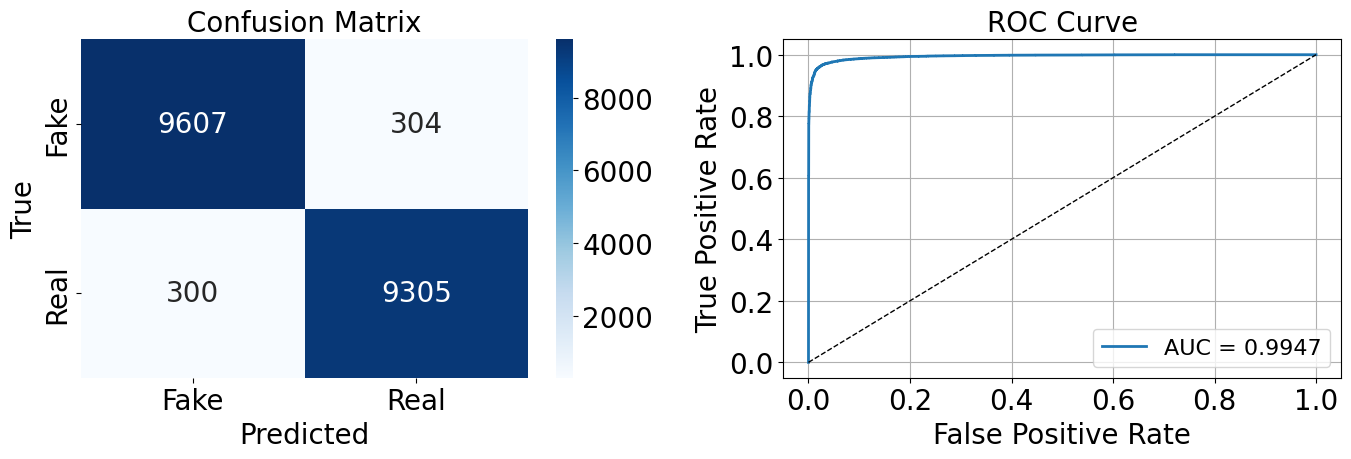

In [ ]:

#dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, matthews_corrcoef, balanced_accuracy_score
)

model_path = '/content/drive/MyDrive/Classroom/deepfake_coban_model.keras'
model = load_model(model_path)

y_true = test.classes  
y_prob = model.predict(test).reshape(-1)
y_pred = (y_prob >= 0.5).astype(int)

y_true = 1 - y_true
y_pred = 1 - y_pred
y_prob = 1 - y_prob

# === Hàm đánh giá ===
def evaluate_deepfake_model(y_true, y_pred, y_prob, title='Model Evaluation'):
    from matplotlib.ticker import MaxNLocator

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    mcc = matthews_corrcoef(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)

    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn)

    print(f"\n===== {title} =====")
    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1-score       : {f1:.4f}")
    print(f"ROC AUC        : {auc:.4f}")
    print(f"MCC            : {mcc:.4f}")
    print(f"Specificity    : {specificity:.4f}")
    print(f"FPR (False +ve): {fpr:.4f}")
    print(f"Balanced Acc.  : {bal_acc:.4f}")

    print("\nClassification Report:\n", classification_report(
        y_true, y_pred, target_names=['Real (0)', 'Fake (1)']))


    cm_flipped = cm[:, [1, 0]]  
    cm_flipped = cm_flipped[[1, 0], :] 


    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Confusion Matrix
    ax1 = axes[0]
    sns.heatmap(cm_flipped, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fake', 'Real'],
                yticklabels=['Fake', 'Real'],
                annot_kws={"size": 20}, cbar=True, ax=ax1)
    cbar = ax1.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)

    ax1.set_xlabel('Predicted', fontsize=20)
    ax1.set_ylabel('True', fontsize=20)
    ax1.set_title('Confusion Matrix', fontsize=20)
    ax1.tick_params(axis='both', labelsize=20)

    # ROC Curve
    fpr_curve, tpr_curve, _ = roc_curve(y_true, y_prob)
    ax2 = axes[1]
    ax2.plot(fpr_curve, tpr_curve, label=f'AUC = {auc:.4f}', lw=2)
    ax2.plot([0, 1], [0, 1], 'k--', lw=1)
    ax2.set_xlabel('False Positive Rate', fontsize=20)
    ax2.set_ylabel('True Positive Rate', fontsize=20)
    ax2.set_title('ROC Curve', fontsize=20)
    ax2.tick_params(axis='both', labelsize=20)
    ax2.legend(loc='lower right', fontsize=16)
    ax2.grid(True)

    plt.tight_layout()
    plt.show()



evaluate_deepfake_model(y_true, y_pred, y_prob, title='Đánh giá mô hình Deepfake (FAKE = positive)')
